In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import scenarios
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 

In [3]:
sns.set_context(context="notebook")
plt.rcParams["figure.dpi"] = 300

### Compute Pareto frontier for aggregated system

In [4]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedBaseline_MinCost = scenarios.build_complete_system("aggregated_baseline", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedBaseline_MinCost, "MinimizeCost")
baseline_cost = aggregatedBaseline_MinCost.totalCost.value
print(f"Baseline cost: {baseline_cost}")

Baseline cost: 11030421.716954304


In [5]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedBaseline_MinEmissions = scenarios.build_complete_system("aggregated_baseline", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedBaseline_MinEmissions, "MinimizeEmissions")
baseline_emissions = aggregatedBaseline_MinEmissions.totalEmissions.value
print(f"Baseline emissions: {baseline_emissions}")

Baseline emissions: 6.651908029322374e-06


In [6]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedGas_MinCost = scenarios.build_gas_only_system("aggregated_gas", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedGas_MinCost, "MinimizeCost")
gas_only_cost = aggregatedGas_MinCost.totalCost.value
print(f"Gas only scenario cost: {gas_only_cost}")

Gas only scenario cost: 17159305.072888896


In [7]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedGas_MinEmissions = scenarios.build_gas_only_system("aggregated_gas", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedGas_MinEmissions, "MinimizeEmissions")
gas_only_emissions = aggregatedGas_MinEmissions.totalEmissions.value
print(f"Gas only scenario emissions: {gas_only_emissions}")

Gas only scenario emissions: 53527567.643337056


In [8]:
site2 = "site2"
site2Baseline_MinCost = scenarios.build_complete_system("site2_baseline", directAccess=False, site=site2)
scenarios.run_scenario(site2Baseline_MinCost, "MinimizeCost")
baseline_cost = site2Baseline_MinCost.totalCost.value
print(f"Baseline cost: {baseline_cost}")

Baseline cost: 2155293.6011893298


In [9]:
site2 = "site2"
site2Baseline_MinEmissions = scenarios.build_complete_system("site2_baseline", directAccess=False, site=site2)
scenarios.run_scenario(site2Baseline_MinEmissions, "MinimizeEmissions")
baseline_emissions = site2Baseline_MinEmissions.totalEmissions.value
print(f"Baseline emissions: {baseline_emissions}")

Baseline emissions: 2.1769531300666364e-08


In [10]:
site2 = "site2"
site2Gas_MinCost = scenarios.build_gas_only_system("site2_gas", directAccess=False, site=site2)
scenarios.run_scenario(site2Gas_MinCost, "MinimizeCost")
gas_only_cost = site2Gas_MinCost.totalCost.value
print(f"Gas only scenario cost: {gas_only_cost}")

Gas only scenario cost: 3444151.7717840318


In [11]:
site2 = "site2"
site2Gas_MinEmissions = scenarios.build_gas_only_system("site2_gas", directAccess=False, site=site2)
scenarios.run_scenario(site2Gas_MinEmissions, "MinimizeEmissions")
gas_only_emissions = site2Gas_MinEmissions.totalEmissions.value
print(f"Gas only scenario emissions: {gas_only_emissions}")

Gas only scenario emissions: 10574364.036246162


## Maia

In [ ]:
n_per_axis = 2
# Create values between baseline_cost and gas_only_cost
costCaps_to_try = np.linspace(baseline_cost, gas_only_cost, n_per_axis)
# Create values between baseline_emissions and gas_only_emissions
emissionsCaps_to_try = np.linspace(baseline_emissions, gas_only_emissions, n_per_axis)

print(costCaps_to_try)
print(emissionsCaps_to_try)

In [ ]:
# Try all scenarios of single obective optimization
allCosts = []
allEmissions = []
# Minimize cost subject to emissions cap
for emissionsCap in emissionsCaps_to_try:
    scenario = scenarios.build_complete_system("aggregated_MinCost_EmissionCap{}".format(emissionsCap), directAccess=False, site=aggregated)
    scenarios.run_scenario(scenario, "MinimizeCostWithEmissionsCap", emissionsCap=emissionsCap, save=False)
    allCosts.append(scenario.totalCost.value)
    allEmissions.append(scenario.totalEmissions.value)
# Minimize emissions subject to cost cap
for costCap in costCaps_to_try:
    scenario = scenarios.build_complete_system("aggregated_MinEmissions_CostCap{}".format(costCap), directAccess=False, site=aggregated)
    scenarios.run_scenario(scenario, "MinimizeEmissionsWithCostCap", costCap=costCap, save=False)
    allCosts.append(scenario.totalCost.value)
    allEmissions.append(scenario.totalEmissions.value)

In [ ]:
# Generate Pareto frontier by finding non-dominated points
pareto_frontier = []
for i in range(len(allCosts)):
    dominated = False
    for j in range(len(allCosts)):
        if allCosts[j] <= allCosts[i] and allEmissions[j] <= allEmissions[i] and i != j:
            dominated = True
            break
    if not dominated:
        pareto_frontier.append((allCosts[i], allEmissions[i]))
pareto_frontier = np.array(pareto_frontier)

# Sort by cost
pareto_frontier = pareto_frontier[np.argsort(pareto_frontier[:,0])]


# Aramis

In [109]:
name = "aggregated"
site = ["site1", "site2", "site3", "site4", "site5"]

In [110]:
baselineSystem = scenarios.build_complete_system(name+"_baseline", directAccess=False, site=site)
scenarios.run_scenario(baselineSystem, "MinimizeCost")
baseline_cost = baselineSystem.totalCost.value

In [111]:
gasSystem = scenarios.build_gas_only_system(name+"_gas", directAccess=False, site=site)
scenarios.run_scenario(gasSystem, "MinimizeCost")
gas_only_cost = gasSystem.totalCost.value

In [138]:
baselineSystem = scenarios.build_complete_system(name+"_baseline", directAccess=False, site=site)
problem = baselineSystem.getModel("emissions", costCap=gas_only_cost)

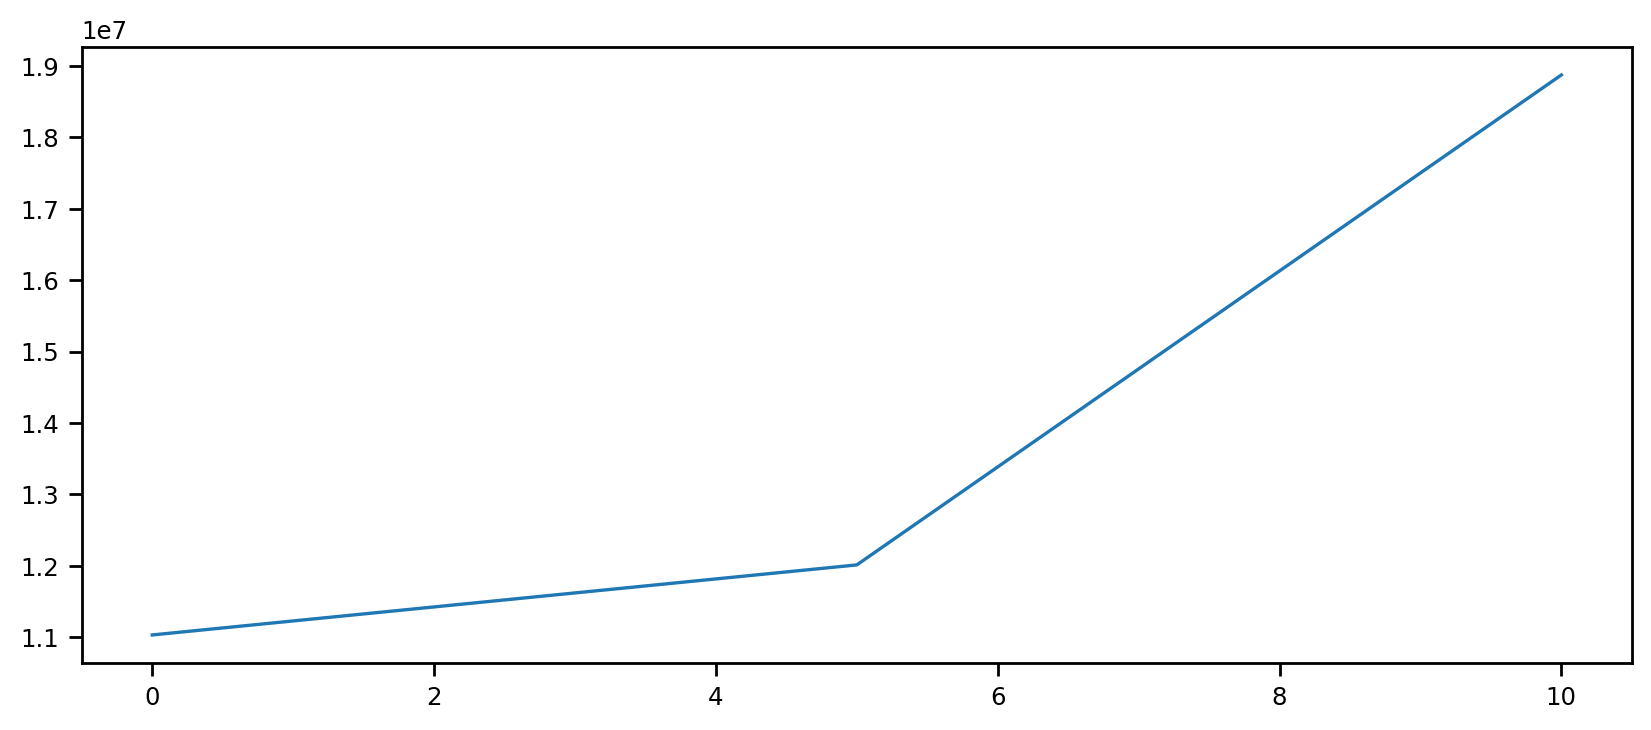

In [139]:
sns.set_context(context="paper")
plt.rcParams["figure.dpi"] = 200
threshold = 0.7
costs1 = np.linspace(baseline_cost+10, threshold*gas_only_cost, 6)
costs2 = np.linspace(threshold*gas_only_cost, 1.1*gas_only_cost, 6)[1:]
costs = np.concatenate((costs1, costs2))
plt.figure(figsize=(10, 4))
plt.plot(costs)
plt.show()


In [140]:
emissions = []
for cost in costs:
     problem.param_dict['costCap'].value = cost
     problem.solve(solver="MOSEK", verbose=False, mosek_params={'MSK_IPAR_INTPNT_MAX_ITERATIONS': 1000})
     print(f"cost: {np.round(baselineSystem.totalCost.value/1e6, 3)} M$, status: {problem.status}, emissions: {np.round(baselineSystem.totalEmissions.value/1e3, 3)} ton CO2")
     emissions.append(baselineSystem.totalEmissions.value)

cost: 11.03 M$, status: optimal, emissions: 12983.629 ton CO2
cost: 11.227 M$, status: optimal, emissions: 8424.206 ton CO2
cost: 11.423 M$, status: optimal, emissions: 7353.679 ton CO2
cost: 11.619 M$, status: optimal, emissions: 6637.168 ton CO2
cost: 11.815 M$, status: optimal, emissions: 6107.154 ton CO2
cost: 12.012 M$, status: optimal, emissions: 5656.266 ton CO2
cost: 13.384 M$, status: optimal, emissions: 3604.893 ton CO2
cost: 14.757 M$, status: optimal, emissions: 2387.663 ton CO2
cost: 16.13 M$, status: optimal, emissions: 1526.851 ton CO2
cost: 17.502 M$, status: optimal, emissions: 863.422 ton CO2
cost: 18.875 M$, status: optimal, emissions: 445.628 ton CO2


In [141]:
emissions = np.array(emissions)
pareto_frontier = np.vstack((costs, emissions)).T
energyCons = (baselineSystem.powerLoad.sum() + baselineSystem.heatLoad.sum())/1000
pareto_frontier = pareto_frontier / energyCons

In [142]:
reductionToBaseline = - (emissions[1:] - emissions[0])
reductionToBaselinePercent = reductionToBaseline / emissions[0] * 100
incrementalReduction = - (emissions[1:] - emissions[:-1])
incrementalCost = costs[1:] - costs[:-1]
marginalCost = incrementalCost / incrementalReduction

## Plots

In [143]:
folder_path = '/Users/aramisdufour/Documents/Stanford/Engineering Future Electricity Systems/decarbonindustry/layouts/results/pareto_frontiers'
file_name = f"pareto_{name}.png"
file_path = os.path.join(folder_path, file_name)

In [144]:
sns.set_context(context="paper")
plt.rcParams["figure.dpi"] = 300

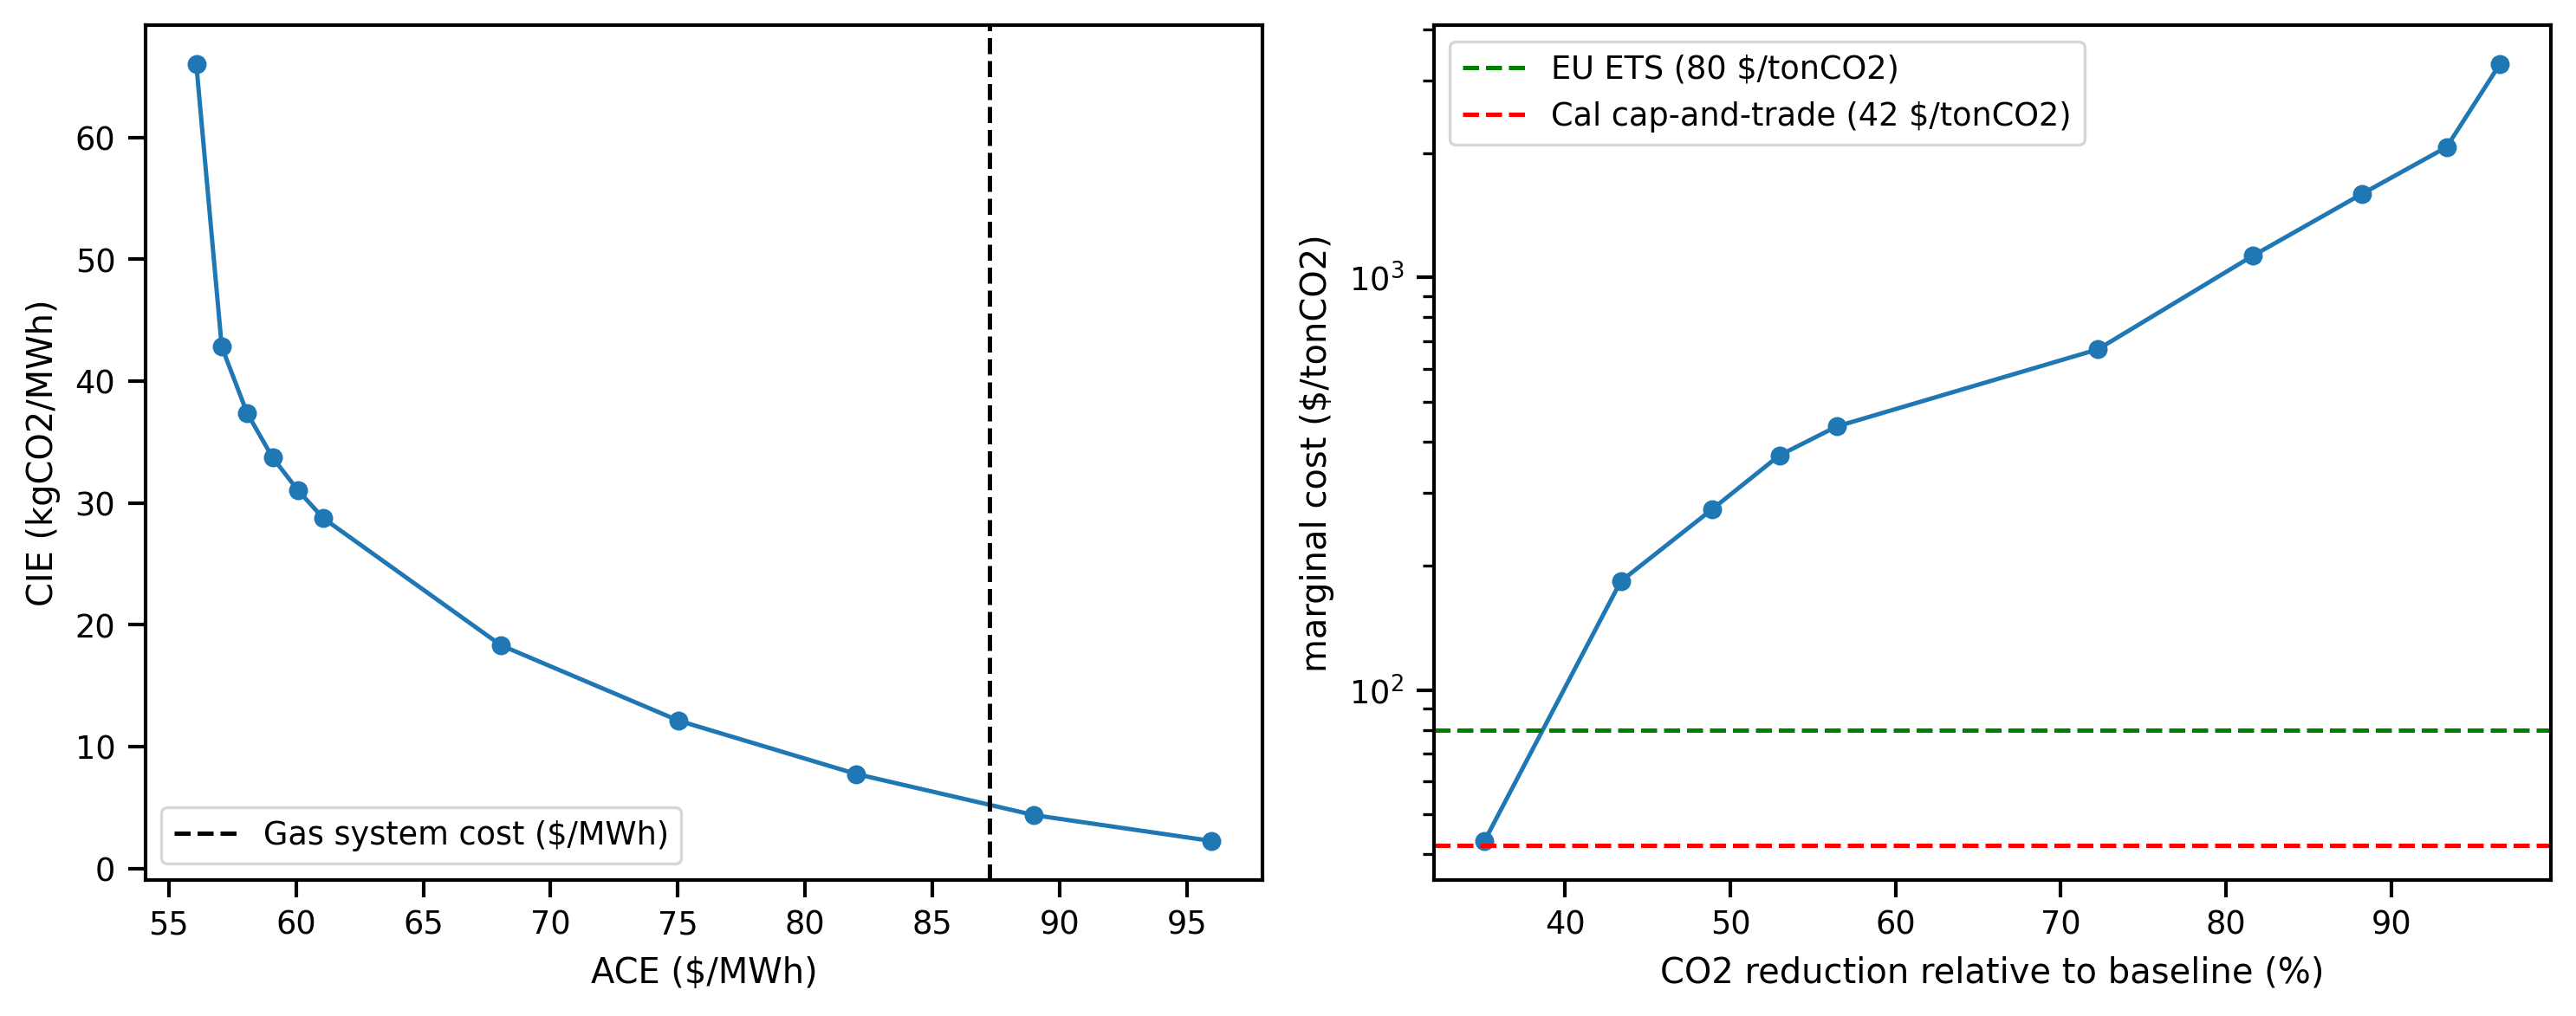

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the results: cost vs emissions
ax1.scatter(costs/ energyCons, emissions/ energyCons, s=20)
# Link the points of the Pareto frontier with a blue line
ax1.plot(pareto_frontier[:,0], pareto_frontier[:,1])
ax1.set_xlabel("ACE ($/MWh)")
ax1.set_ylabel("CIE (kgCO2/MWh)")
ax1.axvline(x=gas_only_cost/energyCons, color='black', linestyle='--', label='Gas system cost ($/MWh)')
ax1.legend()

ax2.scatter(reductionToBaselinePercent, marginalCost*1000, s=20)
# Link the points of the Pareto frontier with a blue line
ax2.plot(reductionToBaselinePercent, marginalCost*1000)
ax2.set_xlabel("CO2 reduction relative to baseline (%)")
ax2.set_ylabel("marginal cost ($/tonCO2)")
ax2.set_yscale("log")
ax2.axhline(y=80, color='g', linestyle='--', label='EU ETS (80 $/tonCO2)')
ax2.axhline(y=42, color='r', linestyle='--', label='Cal cap-and-trade (42 $/tonCO2)')
ax2.legend()

plt.tight_layout()
plt.savefig(file_path)
plt.show()